In [ ]:
#HINTS - 
# join the station and measurement tables for some of the queries
# use the Flask jsonify function to convert your API data to a valid JSON response object

In [ ]:
#Coding Conventions and Formatting
#To receive all points, your code must
# - Place imports at the top of the file, just after any module comments and docstrings, and before module globals and constants
# - Name functions and variables with lowercase characters, with words separated by underscores.
# - Follow DRY (Don't Repeat Yourself) principles, creating maintainable and reusable code.
# - Use concise logic and creative engineering where possible.

# Code must be well commented with concise, relevant notes that other developers can understand.

## Part 1: Analyze and Explore the Climate Data

In [74]:
#Use the SQLAlchemy create_engine() function to connect to your SQLite database.

In [106]:
from pathlib import Path
from sqlalchemy import create_engine, text, inspect, func
import datetime as dt
from sqlalchemy.ext.automap import automap_base
from scipy import stats
from numpy import mean
from sqlalchemy.orm import Session
import matplotlib.pyplot as plt

In [107]:
#create engine with hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [108]:
#Use the SQLAlchemy automap_base() function to reflect your tables into classes
#and then save references to the classes named station and measurement.
base = automap_base()

In [109]:
#use base class to reflect the database tables
base.prepare(autoload_with=engine)

In [110]:
#print classes (tables) mapped to base
base.classes.keys()

['measurement', 'station']

In [111]:
# CAN DELETE THIS ONCE FINISHED - LIKELY DON'T NEED THIS CODE
#create database connection and establish connection
#database_path = Path("../Resources/hawaii.sqlite")
#engine = create_engine(f"sqlite:///{database_path}")
#conn = engine.connect()

In [112]:
#link Python to the database by creating a SQLAlchemy session
session = Session(bind=engine)

In [113]:
measurement = base.classes.measurement

In [114]:
station = base.classes.station

### Precipitation Analysis

In [115]:
#find the most recent date in the dataset (8/23/2017)
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [135]:
#using that date, get the previous 12 months of precipitation data by querying the previous 12 months of data
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
last_year

datetime.date(2016, 8, 23)

In [136]:
#select only the "date" and "prcp" values (for the last 12 months of data w/o passing the date as a variable)
date_prcp = session.query(measurement.date, measurement.prcp).filter(measurement.date >= last_year).all()
date_prcp

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [143]:
#laod the query results into a Pandas DataFrame...explicitly set the column names to 'date' and 'precipitation'
date_prcp_df = pd.DataFrame(date_prcp, columns=['date', 'precipitation'])
date_prcp_df

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [144]:
#sort the DataFrame values by "date"
date_sort_df = date_prcp_df.sort_values('date')
date_sort_df

,date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


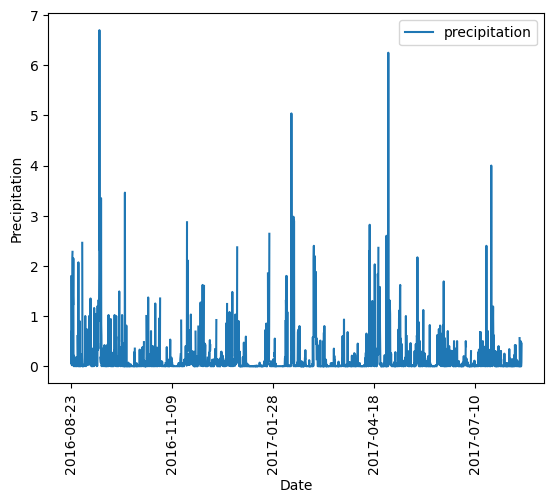

In [145]:
#plot the results by using the DataFrame plot method (see image in BCS) - 'date' as x and 'precipitation' as y
date_sort_df.plot(x='date', y='precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.show()

In [ ]:
#use Pandas to print the summary stats for the precipitation data

### Station Analysis

In [ ]:
#design a query to calculate the total number of stations in the dataset (9)

In [ ]:
#design a query to find the most-active stations (that is, the stations that have the most rows).
#to do so, complete the following steps

In [ ]:
#list the stations and observation counts in descending order - use func.count

In [ ]:
#answer the following questions: which station id has the greatest number of observations? (USC00519281)

In [ ]:
#design a query that calculates the lowest, highest, and average temperatures that filters on the most-active station id found
#in the previous query (USC00519281) - use functions like func.min, func.max, func.avg

In [ ]:
#design a query to get the previous 12 months of temperature observations (TOBS) data. To do so, complete the following:

In [ ]:
#filter by the station that has the greatest number of observations

In [ ]:
#query the previous 12 months of TOBS data for the station

In [ ]:
#plot the results as a histogram with bins=12 (see image in BCS) for the last year of data using 'tobs' as the column to count

In [ ]:
#close the session

# Part 2: Design Your Climate App

In [ ]:
#to get full credit (API SQLite Connection and Landding Page) - Flask application must:
#correctly genreate the engine to the correct sqlite file
#use automap_base() and reflect teh database schema
#correctly save references to the tables in the sqlite file ('measurement' and 'station')
#correctly create and binds the session between the python app and database
#display the available routes on the landing page

In [ ]:
#to get full credit (API Static Routes) - Flask application must include:
#A precipitation route that:
# - Returns json with the date as the key and the value as the precipitation
# - Only returns the jsonified precipitation data for the last year in the database
#A stations route that:
# - Returns jsonified data of all of the stations in the database
#A tobs route that:
# - Returns jsonified data for the most active station (USC00519281)
# - Only returns the jsonified data for the last year of data

In [ ]:
#to get full credit (API Dynamic Route) - Flask application must include:
#A start route that:
# - Accepts the start date as a parameter from the URL
# - Returns the min, max, and average temperatures calculated from the given start date to the end of the dataset
#A start/end route that:
# - Accepts the start and end dates as parameters from the URL
# - Returns the min, max, and average temperatures calculated from the given start date to the given end date

In [ ]:
# /
# - start at the homepage
# - list all the available routes

In [ ]:
# /api/v1.0/precipitation
# - convert the query results from your precipitation analysis (retrieve only the last 12 months of data) to a dictionary
#using 'date' as the key and 'prcp' as the value
# - return the JSON representation of your dictionary

In [ ]:
# /api/v1.0/stations
# - return a JSON list of stations from the dataset

In [ ]:
# /api/v1.0/tobs
# - query the dates and temperature observations of the most-active station for the previous year of data
# - return a JSON list of temperature observations for the previous year

In [ ]:
# /api/v1.0/<start> and /api/v1.0/<start>/<end>
# - return a JSON list of the minimum temperature, the average temperature, and the maximum temperature for a specified 
#start or start-end range
# - for a specified start, calculate 'TMIN','TAVG', and 'TMAX' for all the dates greater than or equal to the start date
# - for a specified start date and end date, calculate 'TMIN', 'TAVG', and 'TMAX' for the dates from the start date to end date
#inclusive